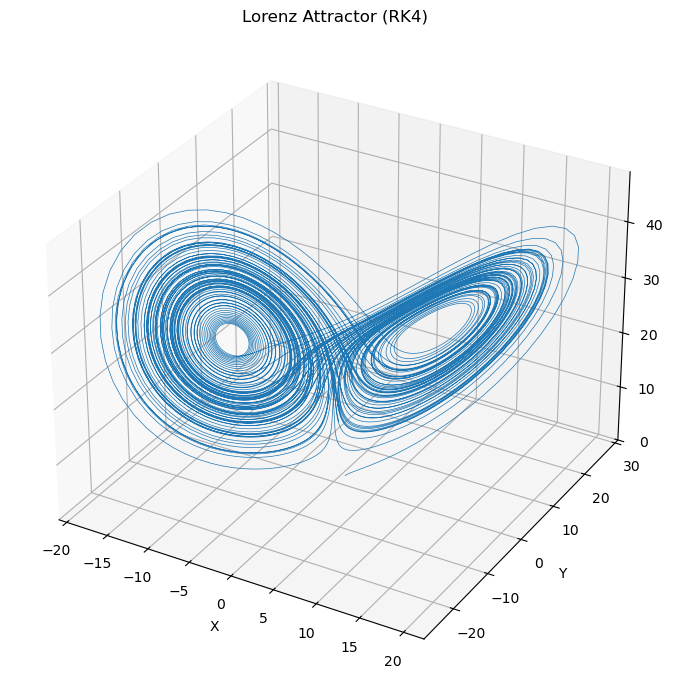

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

def lorenz_deriv(pos):
    x, y, z = pos
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Runge-Kutta 4th order integrator
def rk4_step(f, pos, dt):
    k1 = f(pos)
    k2 = f(pos + dt * k1 / 2)
    k3 = f(pos + dt * k2 / 2)
    k4 = f(pos + dt * k3)
    return pos + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

# Initial condition and time setup
dt = 0.01
num_steps = 10000
pos = np.array([1.0, 1.0, 1.0])
trajectory = np.zeros((num_steps, 3))

# Simulation loop
for i in range(num_steps):
    trajectory[i] = pos
    pos = rk4_step(lorenz_deriv, pos, dt)

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5)
ax.set_title("Lorenz Attractor (RK4)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()


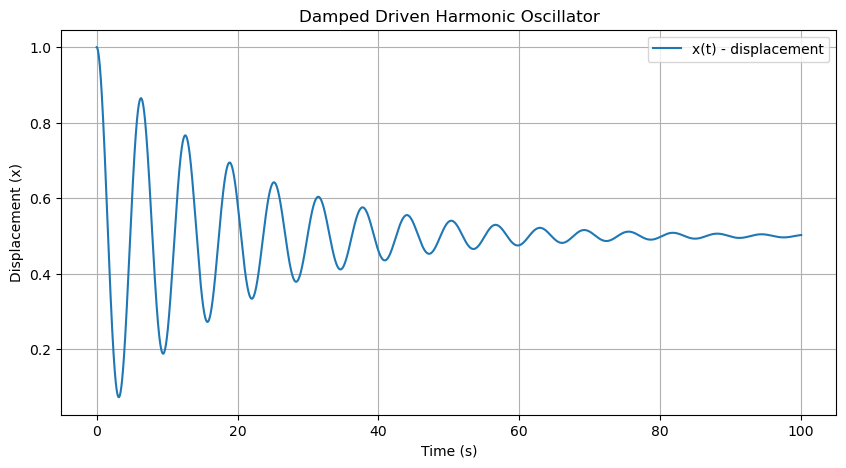

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 系統參數
m = 1.0        # 質量
gamma = 0.1    # 阻尼係數
k = 1.0        # 彈力係數
F0 = 0.5       # 外力大小
omega = 0    # 外力頻率

# 初始條件
x0 = 1.0
v0 = 0.0

# 時間參數
t0 = 0.0
tf = 100.0
dt = 0.01
n = int((tf - t0) / dt)

# 建立時間與狀態陣列
t = np.linspace(t0, tf, n)
x = np.zeros(n)
v = np.zeros(n)

# 設定初始值
x[0] = x0
v[0] = v0

# 定義微分函數
def f(t, x, v):
    dxdt = v
    dvdt = (F0 * np.cos(omega * t) - gamma * v - k * x) / m
    return dxdt, dvdt

# Runge-Kutta 4階實作
for i in range(n - 1):
    dx1, dv1 = f(t[i], x[i], v[i])
    dx2, dv2 = f(t[i] + dt / 2, x[i] + dx1 * dt / 2, v[i] + dv1 * dt / 2)
    dx3, dv3 = f(t[i] + dt / 2, x[i] + dx2 * dt / 2, v[i] + dv2 * dt / 2)
    dx4, dv4 = f(t[i] + dt, x[i] + dx3 * dt, v[i] + dv3 * dt)

    x[i + 1] = x[i] + dt * (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    v[i + 1] = v[i] + dt * (dv1 + 2*dv2 + 2*dv3 + dv4) / 6

# 畫圖
plt.figure(figsize=(10, 5))
plt.plot(t, x, label="x(t) - displacement")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (x)")
plt.title("Damped Driven Harmonic Oscillator")
plt.grid(True)
plt.legend()
plt.show()


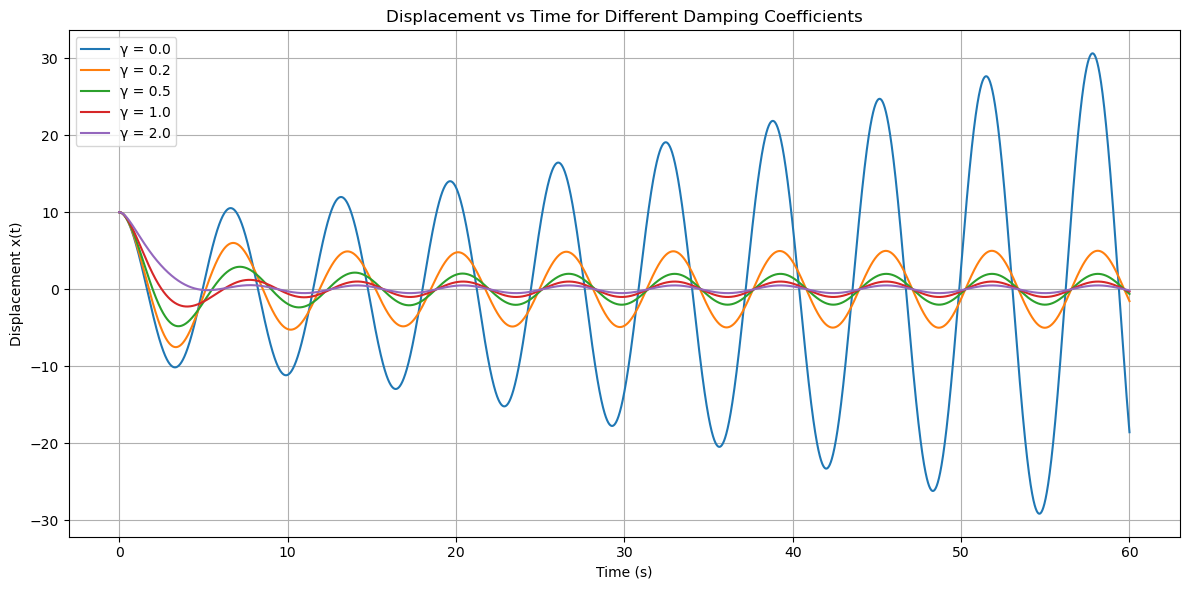

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 系統參數
m = 1.0
k = 1.0
F0 = 1
omega = 1  # 外力頻率略偏離自然頻率 (sqrt(k/m) = 1.0)

# 不同的阻尼值
gamma_list = [0.0, 0.2, 0.5, 1.0, 2.0]  # 無阻尼、欠阻尼、臨界、過阻尼

# 初始條件與時間設定
x0 = 10.0
v0 = 0.0
t0, tf, dt = 0.0, 60.0, 0.01
n = int((tf - t0) / dt)
t = np.linspace(t0, tf, n)

# 微分函數
def f(t, x, v, gamma):
    dxdt = v
    dvdt = (F0 * np.cos(omega * t) - gamma * v - k * x) / m
    return dxdt, dvdt

# 畫圖準備
plt.figure(figsize=(12, 6))

for gamma in gamma_list:
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0

    # Runge-Kutta 4
    for i in range(n - 1):
        dx1, dv1 = f(t[i], x[i], v[i], gamma)
        dx2, dv2 = f(t[i] + dt / 2, x[i] + dx1 * dt / 2, v[i] + dv1 * dt / 2, gamma)
        dx3, dv3 = f(t[i] + dt / 2, x[i] + dx2 * dt / 2, v[i] + dv2 * dt / 2, gamma)
        dx4, dv4 = f(t[i] + dt, x[i] + dx3 * dt, v[i] + dv3 * dt, gamma)

        x[i + 1] = x[i] + dt * (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
        v[i + 1] = v[i] + dt * (dv1 + 2*dv2 + 2*dv3 + dv4) / 6

    # 繪圖
    plt.plot(t, x, label=f"γ = {gamma}")

# 圖表設定
plt.title("Displacement vs Time for Different Damping Coefficients")
plt.xlabel("Time (s)")
plt.ylabel("Displacement x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
import numpy as np

# ----- 系統參數 -----
P = 10                      # Pump rate: N0 -> N3
W34 = 1.0                   # N3 -> N4
W31 = 1.0                   # N3 -> N1
W30 = 1.0                   # N3 -> N0

W43 = 1.0                   # N4 -> N3
W42 = 1.0                   # N4 -> N2
W40 = 1.0                   # N4 -> N0

gamma1 = 0.5                # Decay rate from N1
gamma2 = 0.5                # Decay rate from N2

W31, W42 = 1.0, 1.0         # Upwards branching (used in N1, N2)

N_total = 1000              # Total particle number

# ----- 表達 N4 為 N3 的函數 -----
def N4_from_N3(N3):
    denom = W43 + W42 + W40
    return (W34 / denom) * N3

# ----- 表達 N1 和 N2 -----
def N1_from_N3(N3):
    return (W31 / gamma1) * N3

def N2_from_N4(N4):
    return (W42 / gamma2) * N4

# ----- Ground state from balance equation -----
def N0_from_others(N3, N4, N1, N2):
    return (1 / P) * (W30*N3 + W40*N4 + gamma1*N1 + gamma2*N2 - P)

# ----- 總數守恆條件 -----
def total_particles_error(N3):
    N4 = N4_from_N3(N3)
    N1 = N1_from_N3(N3)
    N2 = N2_from_N4(N4)
    N0 = N0_from_others(N3, N4, N1, N2)
    total = N0 + N1 + N2 + N3 + N4
    return total - N_total

# ----- 使用 Scipy 求解 N3 -----
from scipy.optimize import fsolve

initial_guess = 10.0
N3_solution = fsolve(total_particles_error, initial_guess)[0]

# 解出其他能階
N3 = N3_solution
N4 = N4_from_N3(N3)
N1 = N1_from_N3(N3)
N2 = N2_from_N4(N4)
N0 = N0_from_others(N3, N4, N1, N2)

# ----- 顯示結果 -----
print("Steady-state population distribution:")
print(f"N0 (ground) = {N0:.4f}")
print(f"N1 (mid)    = {N1:.4f}")
print(f"N2 (mid)    = {N2:.4f}")
print(f"N3 (high)   = {N3:.4f}")
print(f"N4 (high)   = {N4:.4f}")
print(f"Total       = {N0 + N1 + N2 + N3 + N4:.4f}")


Steady-state population distribution:
N0 (ground) = 61.5625
N1 (mid)    = 469.2188
N2 (mid)    = 156.4062
N3 (high)   = 234.6094
N4 (high)   = 78.2031
Total       = 1000.0000


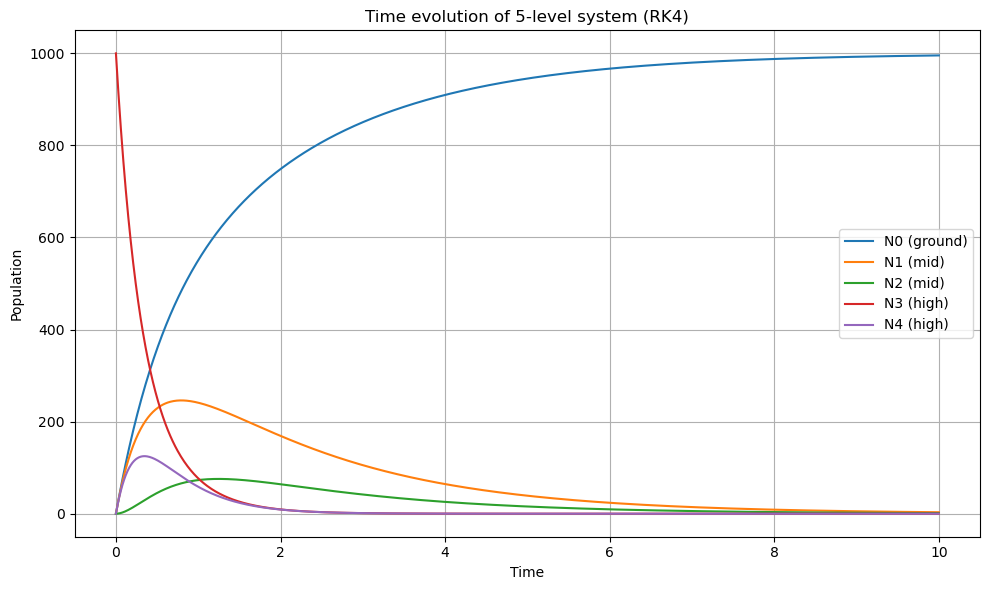

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 系統參數 -----
W34 = 1.0  # N3 -> N4
W31 = 1.0  # N3 -> N1
W30 = 1.0  # N3 -> N0

W43 = 1.0  # N4 -> N3
W42 = 1.0  # N4 -> N2
W40 = 1.0  # N4 -> N0

gamma1 = 0.5  # N1 -> decay (or to N0)
gamma2 = 0.5  # N2 -> decay (or to N0)

# 初始值 (可自行設定)
N0_init = 0
N1_init = 0
N2_init = 0
N3_init = 1000
N4_init = 0

# 時間參數
dt = 0.01
T = 10
steps = int(T / dt)

# 儲存粒子數演化
N0_list = [N0_init]
N1_list = [N1_init]
N2_list = [N2_init]
N3_list = [N3_init]
N4_list = [N4_init]
time_list = [0]

# 定義 rate equations
def rate_eqs(N):
    N0, N1, N2, N3, N4 = N

    dN3dt = - (W34 + W31 + W30) * N3 + W43 * N4
    dN4dt = - (W43 + W42 + W40) * N4 + W34 * N3

    dN1dt = W31 * N3 - gamma1 * N1
    dN2dt = W42 * N4 - gamma2 * N2

    dN0dt = W30 * N3 + W40 * N4 + gamma1 * N1 + gamma2 * N2

    return np.array([dN0dt, dN1dt, dN2dt, dN3dt, dN4dt])

# Runge-Kutta 4th order solver
N = np.array([N0_init, N1_init, N2_init, N3_init, N4_init])

for i in range(steps):
    t = (i+1) * dt
    k1 = rate_eqs(N)
    k2 = rate_eqs(N + 0.5 * dt * k1)
    k3 = rate_eqs(N + 0.5 * dt * k2)
    k4 = rate_eqs(N + dt * k3)

    N = N + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    N0_list.append(N[0])
    N1_list.append(N[1])
    N2_list.append(N[2])
    N3_list.append(N[3])
    N4_list.append(N[4])
    time_list.append(t)

# ----- 畫圖 -----
plt.figure(figsize=(10,6))
plt.plot(time_list, N0_list, label='N0 (ground)')
plt.plot(time_list, N1_list, label='N1 (mid)')
plt.plot(time_list, N2_list, label='N2 (mid)')
plt.plot(time_list, N3_list, label='N3 (high)')
plt.plot(time_list, N4_list, label='N4 (high)')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Time evolution of 5-level system (RK4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


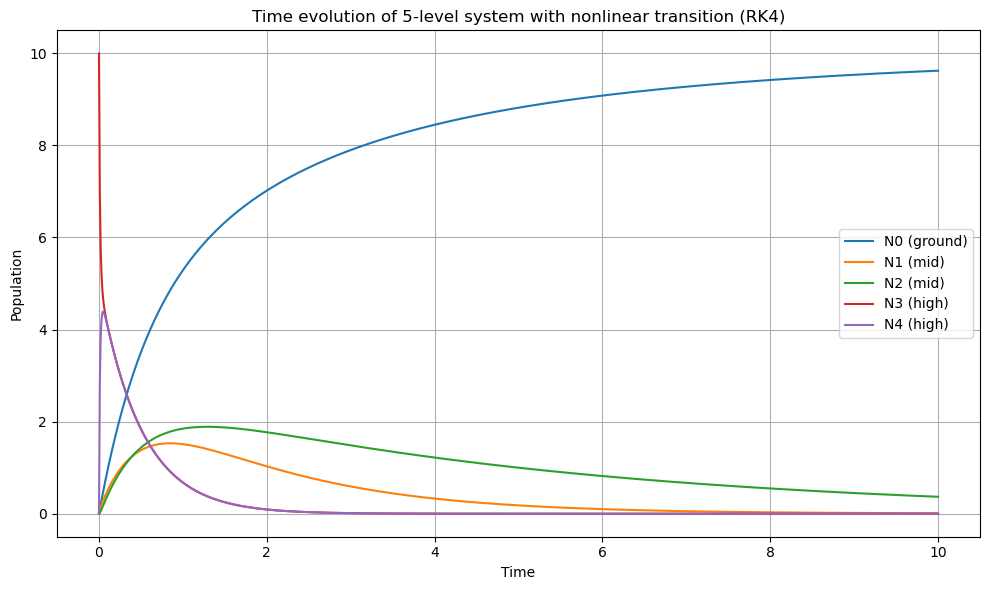

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 系統參數 -----
alpha = 0.5  # 非線性轉移係數（N3 * N4的二次關係）
W31 = 1.0  # N3 -> N1
W30 = 1.0  # N3 -> N0

W43 = 1.0  # N4 -> N3
W42 = 1.0  # N4 -> N2
W40 = 1.0  # N4 -> N0

gamma1 = 0.6  # N1 -> decay (or to N0)
gamma2 = 0.2  # N2 -> decay (or to N0)

# 初始值 (可自行設定)
N0_init = 0
N1_init = 0
N2_init = 0
N3_init = 10
N4_init = 0

# 時間參數
dt = 0.01
T = 10
steps = int(T / dt)

# 儲存粒子數演化
N0_list = [N0_init]
N1_list = [N1_init]
N2_list = [N2_init]
N3_list = [N3_init]
N4_list = [N4_init]
time_list = [0]

# 定義 rate equations
def rate_eqs(N):
    N0, N1, N2, N3, N4 = N

    # 非線性轉移項 (N3 和 N4 之間的二次關係)
    W34 = alpha * N3 * N3
    W43 = alpha * N4 * N4

    dN3dt = - (W34 + W31 + W30) * N3 + W43 * N4
    dN4dt = - (W43 + W42 + W40) * N4 + W34 * N3

    dN1dt = W31 * N3 - gamma1 * N1
    dN2dt = W42 * N4 - gamma2 * N2

    dN0dt = W30 * N3 + W40 * N4 + gamma1 * N1 + gamma2 * N2

    return np.array([dN0dt, dN1dt, dN2dt, dN3dt, dN4dt])

# Runge-Kutta 4th order solver
N = np.array([N0_init, N1_init, N2_init, N3_init, N4_init])

for i in range(steps):
    t = (i+1) * dt
    k1 = rate_eqs(N)
    k2 = rate_eqs(N + 0.5 * dt * k1)
    k3 = rate_eqs(N + 0.5 * dt * k2)
    k4 = rate_eqs(N + dt * k3)

    N = N + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    N0_list.append(N[0])
    N1_list.append(N[1])
    N2_list.append(N[2])
    N3_list.append(N[3])
    N4_list.append(N[4])
    time_list.append(t)
    # print(N[0]+N[1]+N[2]+N[3]+N[4])

# ----- 畫圖 -----
plt.figure(figsize=(10,6))
plt.plot(time_list, N0_list, label='N0 (ground)')
plt.plot(time_list, N1_list, label='N1 (mid)')
plt.plot(time_list, N2_list, label='N2 (mid)')
plt.plot(time_list, N3_list, label='N3 (high)')
plt.plot(time_list, N4_list, label='N4 (high)')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Time evolution of 5-level system with nonlinear transition (RK4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
